# Lung Cancer Prediction Project

## Loading and Exploring the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("..\Datasets\lung_cancer.csv")

In [3]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


So we can see our various features and our target variable which is the column **'LUNG_CANCER'**

In [4]:
print("Shape of data: ", data.shape)


Shape of data:  (309, 16)


We can see that the dataset contains 309 rows and 16 columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

### Datatype Conversion
We can see that the LUNG_CANCER column is an object data type so we'll convert the data into numerical data type by converting **YES to 1** and **NO to 0**.

We will also convert the other columns to numerical data types between 1 and 0 to help us when we're building the model.

In [6]:
data.loc[data['GENDER']=='M','GENDER'] = 1
data.loc[data['GENDER']=='F','GENDER'] = 0
data['GENDER'] = data['GENDER'].astype('int')
data.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [7]:
data.loc[data['LUNG_CANCER']=='YES','LUNG_CANCER'] = 1
data.loc[data['LUNG_CANCER']=='NO','LUNG_CANCER'] = 0
data['LUNG_CANCER'] = data['LUNG_CANCER'].astype('int')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


We have now changed the Gender and Lung_cancer columns to numerical values 1 and 0 where Male and having lung_cancer = 1 and Female and Not having Lung_Cancer = 0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [9]:
data["SMOKING"].replace({2: 1, 1: 0}, inplace=True)
data["YELLOW_FINGERS"].replace({2: 1, 1: 0}, inplace=True)
data["ANXIETY"].replace({2: 1, 1: 0}, inplace=True)
data["PEER_PRESSURE"].replace({2: 1, 1: 0}, inplace=True)
data["CHRONIC DISEASE"].replace({2: 1, 1: 0}, inplace=True)
data["FATIGUE "].replace({2: 1, 1: 0}, inplace=True)
data["ALLERGY "].replace({2: 1, 1: 0}, inplace=True)
data["WHEEZING"].replace({2: 1, 1: 0}, inplace=True)
data["ALCOHOL CONSUMING"].replace({2: 1, 1: 0}, inplace=True)
data["COUGHING"].replace({2: 1, 1: 0}, inplace=True)
data["SHORTNESS OF BREATH"].replace({2: 1, 1: 0}, inplace=True)
data["SWALLOWING DIFFICULTY"].replace({2: 1, 1: 0}, inplace=True)
data["CHEST PAIN"].replace({2: 1, 1: 0}, inplace=True)

In [10]:
data.sample(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
111,1,61,1,1,1,0,0,1,1,0,1,0,1,1,1,1
68,0,76,1,1,1,1,0,1,1,0,0,0,1,1,1,1
228,0,56,0,1,0,1,0,1,0,0,0,1,1,0,1,1
141,1,62,1,0,1,0,0,1,0,1,1,1,1,0,1,1
101,0,81,0,1,1,1,1,1,1,1,0,1,1,1,1,1


In [11]:
data.rename(columns={"CHRONIC DISEASE": "CHRONIC_DISEASE",
                   "ALCOHOL CONSUMING": 'ALCOHOL_CONSUMPTION',
                    "SHORTNESS OF BREATH": "SHORTNESS_OF_BREATH",
                    "CHEST PAIN":"CHEST_PAIN",
                    "SWALLOWING DIFFICULTY": "SWALLOWING_DIFFICULTY"},
          inplace=True, errors='raise')

In [12]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMPTION,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [13]:
data.to_csv("../Datasets/processed_lung_cancer.csv")

We will also rename some columns so as to remove the white space in them

We have now converted the variables from "2" and "1" to "1" and "0".

In [14]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMPTION      0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

We can see that the data does not contain any missing values.

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GENDER,309.0,0.524272,0.500221,0.0,0.0,1.0,1.0,1.0
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,0.563107,0.496806,0.0,0.0,1.0,1.0,1.0
YELLOW_FINGERS,309.0,0.569579,0.495938,0.0,0.0,1.0,1.0,1.0
ANXIETY,309.0,0.498382,0.500808,0.0,0.0,0.0,1.0,1.0
PEER_PRESSURE,309.0,0.501618,0.500808,0.0,0.0,1.0,1.0,1.0
CHRONIC_DISEASE,309.0,0.504854,0.500787,0.0,0.0,1.0,1.0,1.0
FATIGUE,309.0,0.673139,0.469827,0.0,0.0,1.0,1.0,1.0
ALLERGY,309.0,0.556634,0.497588,0.0,0.0,1.0,1.0,1.0
WHEEZING,309.0,0.556634,0.497588,0.0,0.0,1.0,1.0,1.0


## Key Insights

A large portion of individuals in the dataset are diagnosed with lung cancer (LUNG_CANCER mean = 0.874).

Variables like FATIGUE and SHORTNESS_OF_BREATH have high means (0.673 and 0.641), suggesting frequent occurrence.

AGE has a significant range (21–87), with an older average population.

## Exploratory Data Analysis

Total No. of Non-Lung Cancer Cases:  39
Total No. of Lung Cancer cases:  270


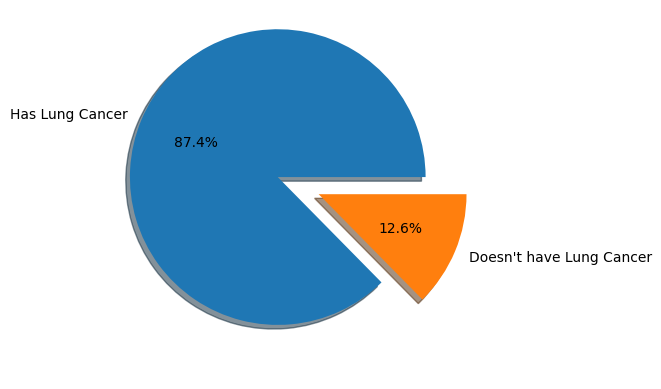

In [16]:
len_lung_cancer = len(data['LUNG_CANCER'][data.LUNG_CANCER == 1])
len_not_lung_cancer = len(data['LUNG_CANCER'][data.LUNG_CANCER == 0])

arr = np.array([len_lung_cancer, len_not_lung_cancer])
labels = ['Has Lung Cancer',"Doesn't have Lung Cancer"]
print('Total No. of Non-Lung Cancer Cases: ', len_not_lung_cancer)
print('Total No. of Lung Cancer cases: ', len_lung_cancer)

plt.pie(arr, labels = labels, explode=[0.3, 0.0], shadow = True, autopct='%1.1f%%',)
plt.savefig("../Charts/Cancer Analysis.png", bbox_inches='tight')
plt.show()

The Pie Chart helps us to see clearly the ratio of people with lung cancer and people who do not have lung cancer. 


                 Feature 1       Feature 2  Correlation
52          YELLOW_FINGERS         ANXIETY     0.565829
67                 ANXIETY  YELLOW_FINGERS     0.565829
212  SWALLOWING_DIFFICULTY         ANXIETY     0.489403
               Feature 1            Feature 2  Correlation
80         PEER_PRESSURE               GENDER    -0.275564
58        YELLOW_FINGERS  ALCOHOL_CONSUMPTION    -0.289025
163  ALCOHOL_CONSUMPTION       YELLOW_FINGERS    -0.289025
       Feature 1              Feature 2  Correlation
248  LUNG_CANCER               ALLERGY      0.327766
250  LUNG_CANCER    ALCOHOL_CONSUMPTION     0.288533
253  LUNG_CANCER  SWALLOWING_DIFFICULTY     0.259730
249  LUNG_CANCER               WHEEZING     0.249300
251  LUNG_CANCER               COUGHING     0.248570
254  LUNG_CANCER             CHEST_PAIN     0.190451
245  LUNG_CANCER          PEER_PRESSURE     0.186388
243  LUNG_CANCER         YELLOW_FINGERS     0.181339
247  LUNG_CANCER               FATIGUE      0.150673
244  LUNG_

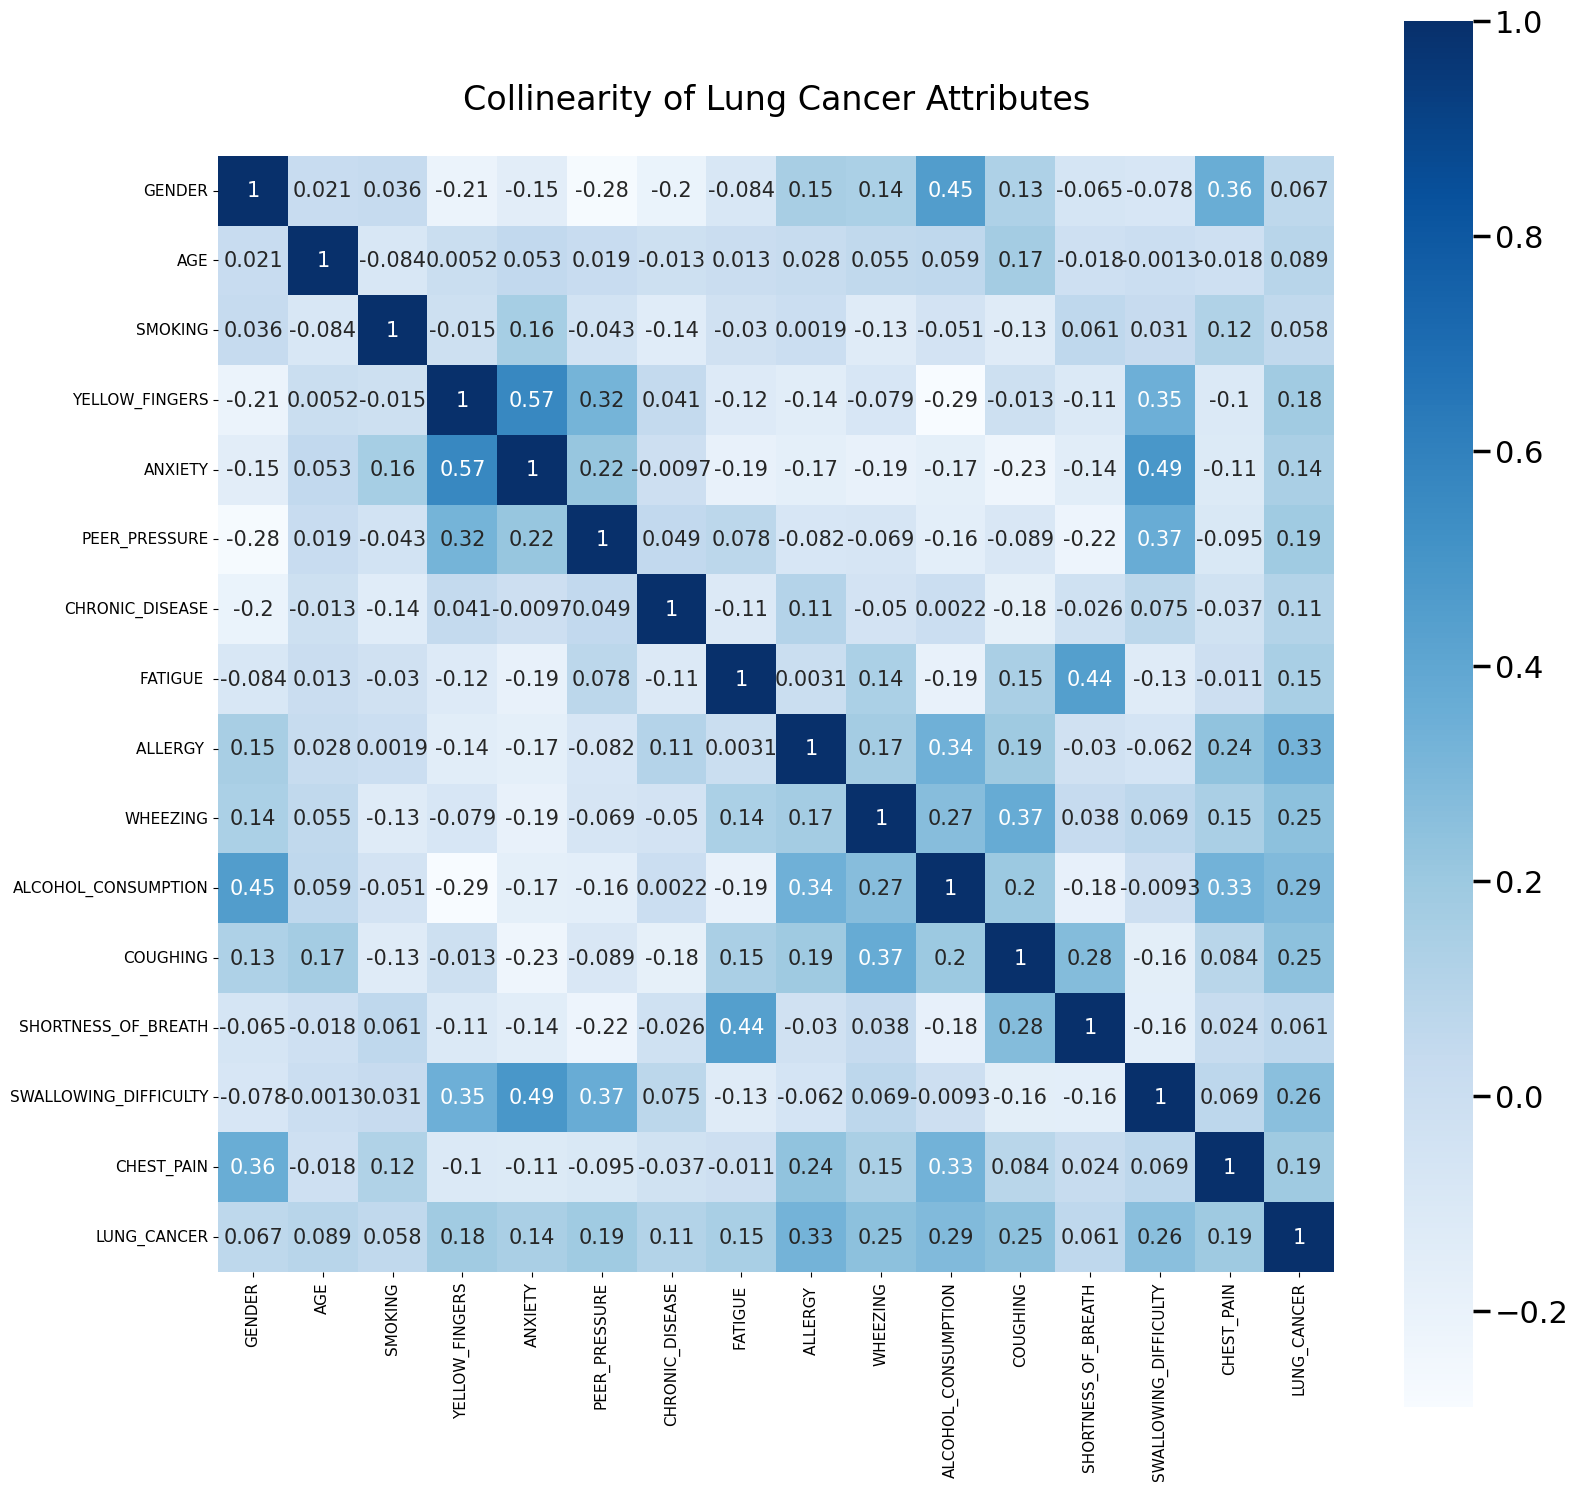

In [17]:
fig, ax = plt.subplots(figsize=(18,18))
sns.set_context('poster')
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='Blues', annot=True, square=True, annot_kws={"size":15})
ax.set_title('Collinearity of Lung Cancer Attributes\n')

ax.set_xticklabels(ax.get_xticklabels(), fontsize=11) 
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11) 

corr_table = corr.unstack().reset_index()
corr_table.columns = ['Feature 1', 'Feature 2', 'Correlation']
corr_table = corr_table[corr_table['Feature 1'] != corr_table['Feature 2']]
corr_table = corr_table.sort_values(by='Correlation', ascending=False)
# print top 10 positive correlations
print(corr_table.head(3))
# print top 10 negative correlations
print(corr_table.tail(3))
# print top positive correlated features with LUNG_CANCER
print(corr_table[corr_table['Feature 1'] == 'LUNG_CANCER'].sort_values(by='Correlation', ascending=False).head(10))
plt.savefig('../Charts/HeatMap1.png', bbox_inches='tight')

## Insights from the Heatmap

Strong Positive Correlations:
YELLOW_FINGERS and ANXIETY have the highest positive correlation (0.5658), suggesting a notable link between the two.

Moderate Positive Correlations with LUNG_CANCER:
ALLERGY (0.3278) and ALCOHOL_CONSUMPTION (0.2885) show moderate positive correlations with lung cancer.

Weak Positive Correlations with LUNG_CANCER:
SWALLOWING_DIFFICULTY (0.2597) and WHEEZING (0.2493) also show weak but relevant associations.

Lowest Correlation with LUNG_CANCER:
ANXIETY (0.1449) and FATIGUE (0.1507) have the weakest association.

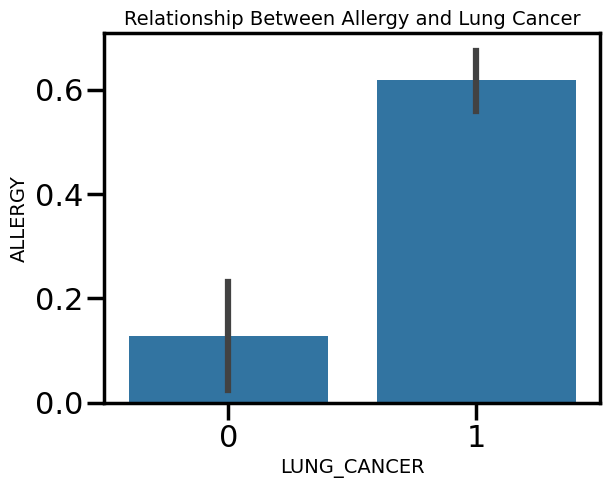

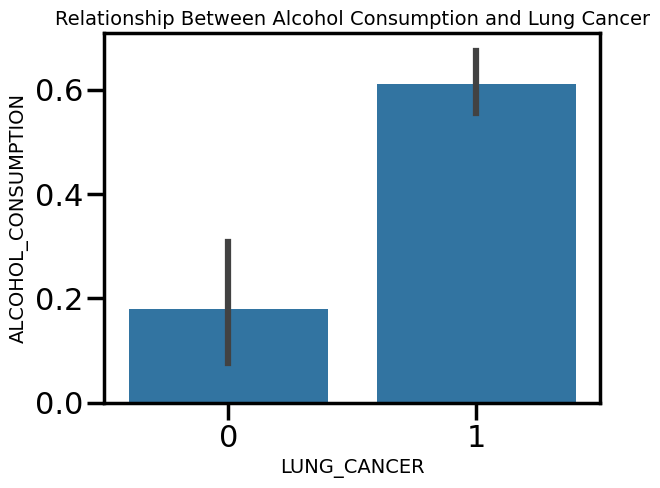

In [18]:
ax = sns.barplot(x=data['LUNG_CANCER'], y=data['ALLERGY '])
plt.xlabel("LUNG_CANCER", fontsize=14)
plt.ylabel("ALLERGY", fontsize=14)
plt.title("Relationship Between Allergy and Lung Cancer", fontsize=14)
plt.savefig('../Charts//Relationship Between Allergy and Lung Cancer.png', bbox_inches='tight')
plt.show()

ax = sns.barplot(x=data['LUNG_CANCER'], y=data['ALCOHOL_CONSUMPTION'])
plt.xlabel("LUNG_CANCER", fontsize=14)
plt.ylabel("ALCOHOL_CONSUMPTION", fontsize=14)
plt.title("Relationship Between Alcohol Consumption and Lung Cancer", fontsize=14)
plt.savefig('../Charts/Relationship Between Alcohol Consumption and Lung Cancer.png', bbox_inches='tight')
plt.show()



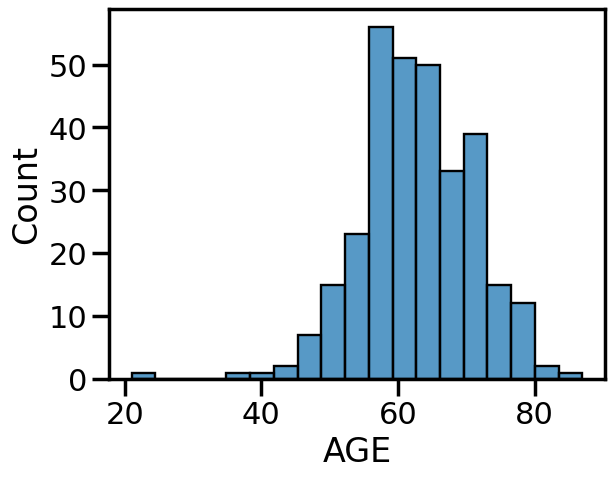

In [19]:
# age distribution plot
sns.histplot(data['AGE'])
plt.savefig('../Charts/ageplot.png', bbox_inches='tight')
plt.show()

## Splitting the Data

In [20]:
from sklearn.model_selection import train_test_split

X = data.drop("LUNG_CANCER", axis = 1)
y = data.LUNG_CANCER

print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (309, 15)
Shape of y:  (309,)


In [21]:
X_train, X_test_p, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Engineering

In [22]:
def add_interaction(X):
    features = X.columns
    n = len(features)
    X_int = X.copy(deep=True)
    
    for i in range(n):
        feature_i_name = features[i]
        feature_i_data = X[feature_i_name]
        
        for j in range(i+1, n):
            feature_j_name = features[j]
            feature_j_data = X[feature_j_name]
            feature_i_j_name = feature_i_name+"_x_"+feature_j_name
            X_int[feature_i_j_name] = feature_i_data * feature_j_data
            
    return X_int

x_train_mod = add_interaction(X_train)
X_test_p_mod = add_interaction(X_test_p)

What the above function does is that it creates more feature columns by multiplying each column with another column and creates a new column for the product.

In [23]:
x_train_mod.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,...,ALCOHOL_CONSUMPTION_x_COUGHING,ALCOHOL_CONSUMPTION_x_SHORTNESS_OF_BREATH,ALCOHOL_CONSUMPTION_x_SWALLOWING_DIFFICULTY,ALCOHOL_CONSUMPTION_x_CHEST_PAIN,COUGHING_x_SHORTNESS_OF_BREATH,COUGHING_x_SWALLOWING_DIFFICULTY,COUGHING_x_CHEST_PAIN,SHORTNESS_OF_BREATH_x_SWALLOWING_DIFFICULTY,SHORTNESS_OF_BREATH_x_CHEST_PAIN,SWALLOWING_DIFFICULTY_x_CHEST_PAIN
7,0,51,1,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
45,1,72,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
97,1,59,1,0,0,1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
92,1,52,1,0,0,0,1,1,1,1,...,0,0,1,1,0,0,0,0,0,1
198,0,73,1,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


We can now see that we have 120 columns for the modified training set after applying the function.

## Model Building
The evaluate_model function below will be used to evaluate the accuracy of our model and also give the confusion matrix of our model.

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def evaluate_model(y_test, y_pred):
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("Precision Score: ", precision_score(y_test, y_pred))
    print("Recall Score: ", recall_score(y_test, y_pred))
    print("F1 Score: ", 2 * (precision_score(y_test, y_pred) * recall_score(y_test, y_pred)) / (precision_score(y_test, y_pred) + recall_score(y_test, y_pred)))
    
    df = {'y_Actual': y_test, 'y_Predicted': y_pred}

    df1 = pd.DataFrame(df, columns = ['y_Actual','y_Predicted'])

    clf_confusion_matrix = pd.crosstab(df['y_Predicted'], df['y_Actual'], rownames = ['Predicted'], colnames=['Actual'])

    sns.heatmap(clf_confusion_matrix, annot=True)
    plt.savefig('../Charts/confusion Matriz.png', bbox_inches='tight')
    

### Logistic Regression
We will be using the Logistic Regression model as a baseline model.

In [25]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train, y_train)

lr_clf_pred = lr_clf.predict(X_test_p)

Accuracy Score:  0.9032258064516129
Precision Score:  0.9107142857142857
Recall Score:  0.9807692307692307
F1 Score:  0.9444444444444444


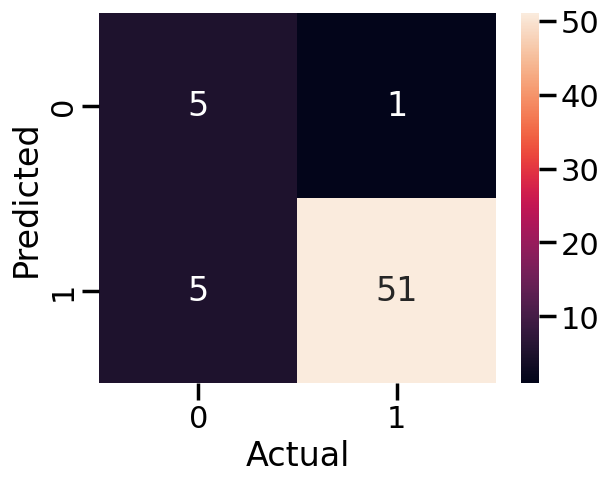

In [26]:
y_pred = lr_clf.predict(X_test_p)
evaluate_model(y_test, y_pred)

Building Logistic Regression model with standardiser

Accuracy Score:  0.9032258064516129
Precision Score:  0.9107142857142857
Recall Score:  0.9807692307692307
F1 Score:  0.9444444444444444


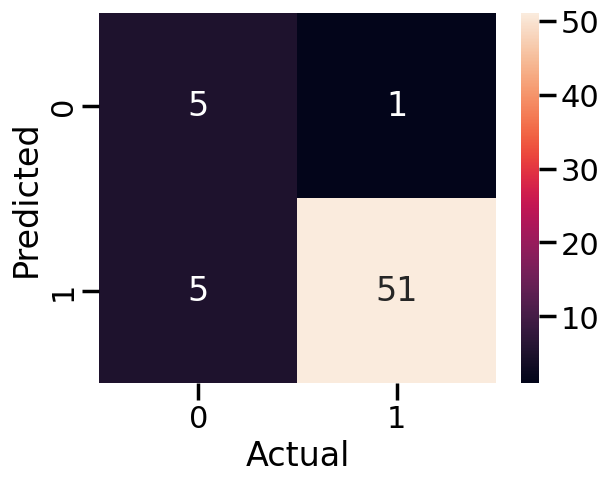

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_clf_pipe = make_pipeline(StandardScaler(), LogisticRegression())
lr_clf_pipe.fit(X_train, y_train)

y_pred1 = lr_clf_pipe.predict(X_test_p)
evaluate_model(y_test, y_pred1)

In [28]:
import joblib
joblib.dump(lr_clf_pipe, 'lung_cancer_predictor_model.pkl')
model = joblib.load('lung_cancer_predictor_model.pkl')
model.predict(X_test_p)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [29]:
predictions = model.predict(X_test_p)
df_pred = pd.DataFrame(predictions)
df_pred.head()

,0
0,1
1,1
2,1
3,1
4,1


# Importing Data for Finding Cancer Stage

In [30]:
df=pd.read_csv('../Datasets/lung_cancer_for_stage.csv')

# Data outline and preprocessing

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53427 entries, 0 to 53426
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              53427 non-null  int64  
 1   age              53427 non-null  int64  
 2   gender           53427 non-null  object 
 3   race             53166 non-null  object 
 4   smoker           53427 non-null  object 
 5   days_to_cancer   2033 non-null   float64
 6   stage_of_cancer  2032 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ MB


In [32]:
df.head()

,pid,age,gender,race,smoker,days_to_cancer,stage_of_cancer
0,100001,70,Male,White,Current,NaN,NaN
1,100002,66,Male,White,Current,NaN,NaN
2,100003,64,Male,White,Current,NaN,NaN
3,100004,60,Male,White,Former,NaN,NaN
4,100005,64,Male,White,Former,NaN,NaN


In [33]:
df['stage_of_cancer'].unique()

array([nan, 'IA', 'IIB', 'IV', 'IIIB', 'IIIA', 'IIA', 'IB'], dtype=object)

**Convert 'stage_of_cancer' to 0, 1, 2,3 and 4**

In [34]:
df['stage_of_cancer'] = df['stage_of_cancer'].replace({'IA': 1, 'IB' : 1,'IIA':2,'IIB':2,'IIIA':3,'IIIB':3,'IV':4})
df['smoker'] = df['smoker'].replace({'Current':1,'Former':0})

In [35]:
df=df.fillna({'stage_of_cancer': 0, 'days_to_cancer': 0, 'race': 'Others'})

In [36]:
df[['stage_of_cancer', 'days_to_cancer']] = df[['stage_of_cancer', 'days_to_cancer']].astype('int')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53427 entries, 0 to 53426
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pid              53427 non-null  int64 
 1   age              53427 non-null  int64 
 2   gender           53427 non-null  object
 3   race             53427 non-null  object
 4   smoker           53427 non-null  int64 
 5   days_to_cancer   53427 non-null  int64 
 6   stage_of_cancer  53427 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.9+ MB


**Pairplot of features**

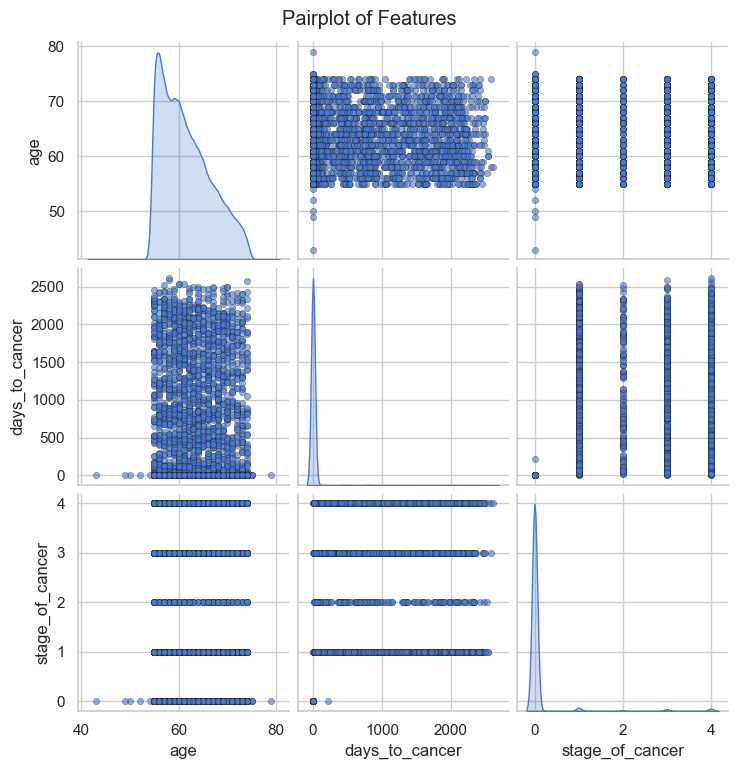

In [38]:
sns.set(style="whitegrid", palette="muted")
pairplot = sns.pairplot(df.drop(columns=['pid','smoker']), diag_kind="kde", plot_kws={'alpha':0.6, 's':20, 'edgecolor':'k'}, height=2.5)
pairplot.fig.suptitle("Pairplot of Features", y=1.02)
plt.savefig('../Charts/pairplot.png', bbox_inches='tight')
plt.show()

**Heatmap of correlation**

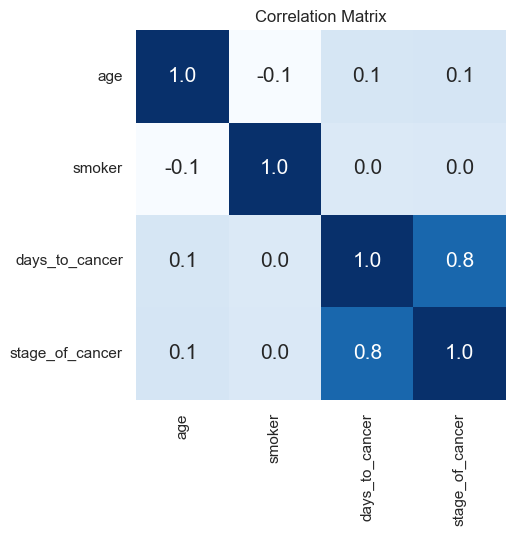

In [39]:
sns.heatmap(df.drop(columns=['pid','race','gender']).corr(),cbar=False, cmap='Blues', fmt='.1f',annot=True, square=True, annot_kws={"size":15})
plt.title("Correlation Matrix")
plt.savefig('../Charts/Correlation Matrix.png', bbox_inches='tight')

**The number of each stages**

In [40]:
df.groupby('stage_of_cancer')['stage_of_cancer'].count()

stage_of_cancer
0    51395
1      831
2      146
3      459
4      596
Name: stage_of_cancer, dtype: int64

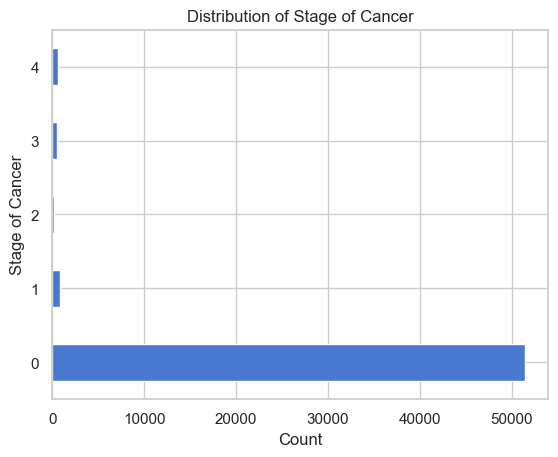

In [41]:
df.groupby('stage_of_cancer')['stage_of_cancer'].count().plot.barh()
plt.xlabel('Count')
plt.ylabel('Stage of Cancer')
plt.title('Distribution of Stage of Cancer')
plt.savefig('../Charts/Distribution of Stage of Cancer.png', bbox_inches='tight')
plt.show()

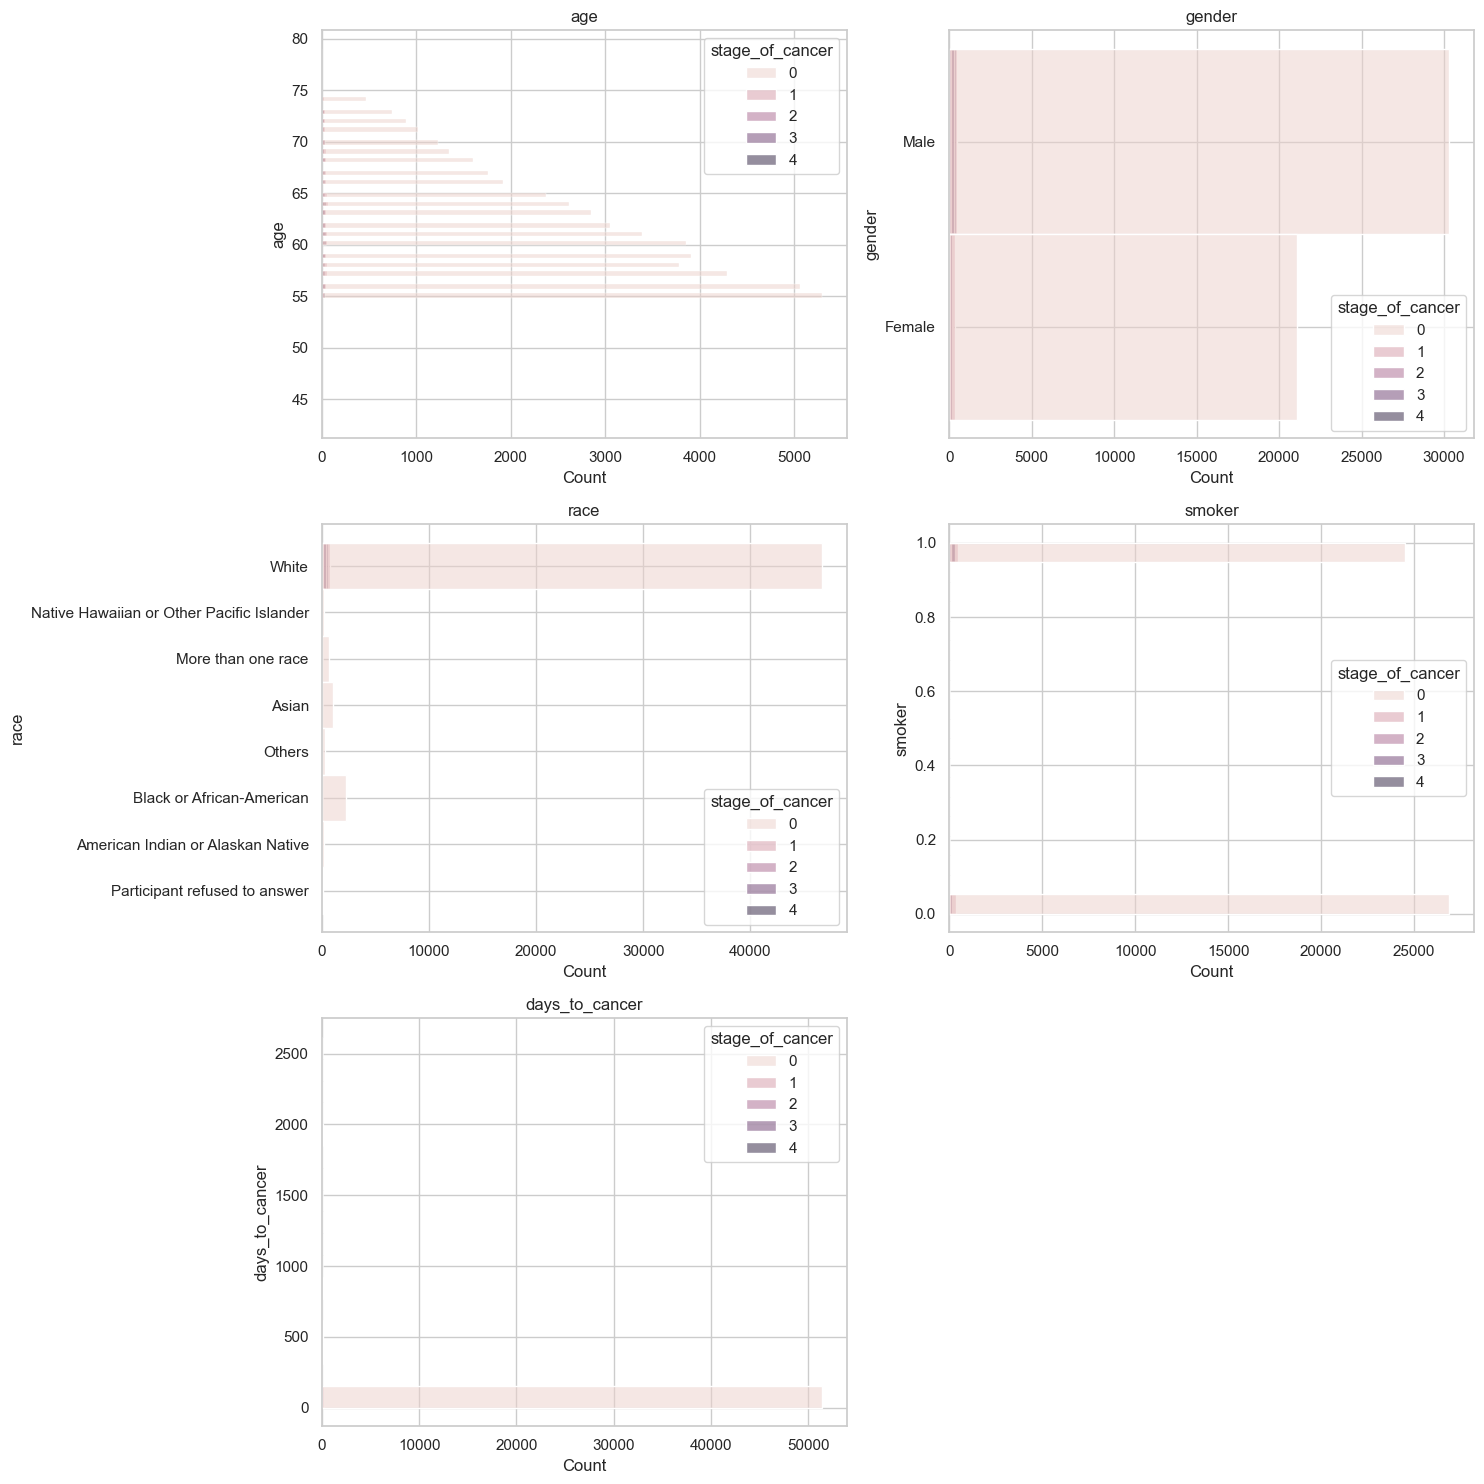

In [42]:
col=['age', 'gender', 'race', 'smoker', 'days_to_cancer']
fig = plt.figure(figsize=(15,15))

for i in range(len(col)):
    plt.subplot(3,2,i+1)
    plt.title(col[i])
    sns.histplot(data=df,y=df[col[i]],hue='stage_of_cancer')

plt.tight_layout()
plt.savefig('../Charts/Distribution of Features.png', bbox_inches='tight')
plt.show()

**The number of non cancer (0) is very huge, so I should drop 0 to analize the features of each stage Ⅰ to Ⅳ.**

# Stage Ⅰ to Ⅳ Analysis

**Dataset which does not include "non cancer"**

In [43]:
df1=df

**Pairplot of features**

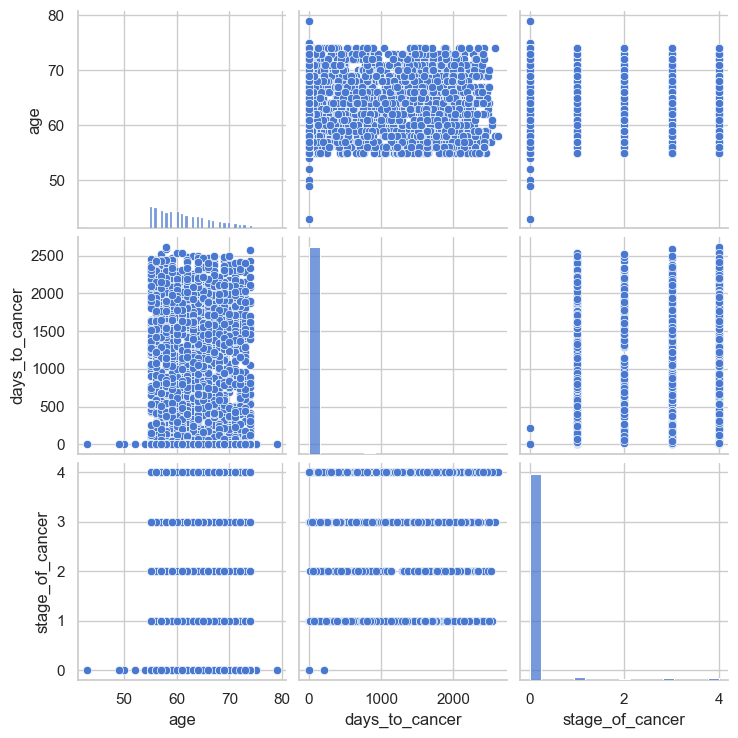

In [44]:
sns.pairplot(df1.drop(columns=['pid','smoker']))
plt.savefig('../Charts/pairplot1.png', bbox_inches='tight')

**Histplot of features by stage**

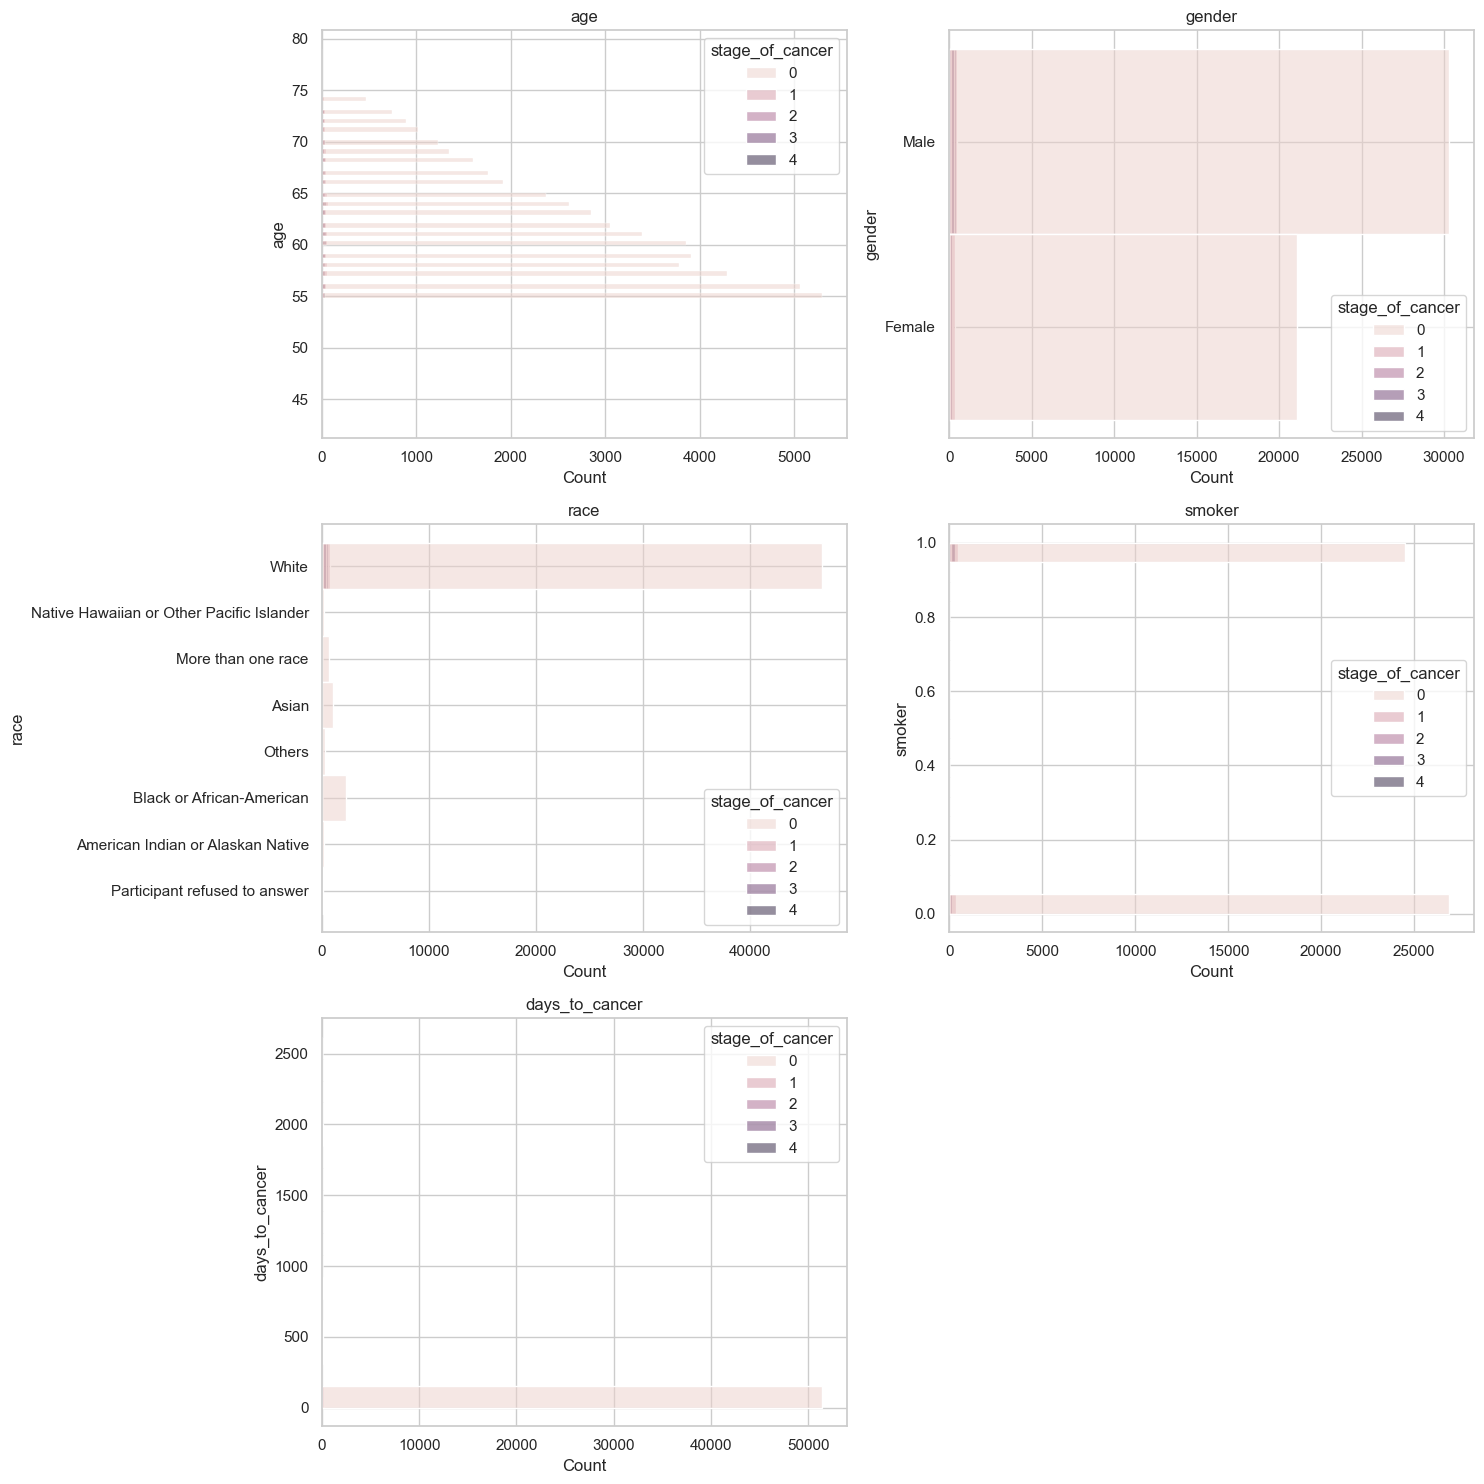

In [45]:
col=['age', 'gender', 'race', 'smoker', 'days_to_cancer']
fig = plt.figure(figsize=(15,15))

for i in range(len(col)):
    plt.subplot(3,2,i+1)
    plt.title(col[i])
    sns.histplot(data=df1,y=df1[col[i]],hue='stage_of_cancer')

plt.tight_layout()
plt.savefig('../Charts/Distribution of Features1.png', bbox_inches='tight')
plt.show()

**High stage is found more in Male, Current Smoker and longer days to cancer.**

# Lung Cancer Stage Classification Model

**Convert categorical variable into dummy/indicator variables**

In [46]:
df2 = pd.get_dummies(df1, columns=['race'], drop_first=True)
df2 = df2.reset_index(drop=True)
df2.head()

,pid,age,gender,smoker,days_to_cancer,stage_of_cancer,race_Asian,race_Black or African-American,race_More than one race,race_Native Hawaiian or Other Pacific Islander,race_Others,race_Participant refused to answer,race_White
0,100001,70,Male,1,0,0,False,False,False,False,False,False,True
1,100002,66,Male,1,0,0,False,False,False,False,False,False,True
2,100003,64,Male,1,0,0,False,False,False,False,False,False,True
3,100004,60,Male,0,0,0,False,False,False,False,False,False,True
4,100005,64,Male,0,0,0,False,False,False,False,False,False,True


In [47]:
#replace all True values with 1 and False values with 0
df2=df2.replace({True:1,False:0})
df2=df2.replace({'Male':1,'Female':0})
df2.head()

,pid,age,gender,smoker,days_to_cancer,stage_of_cancer,race_Asian,race_Black or African-American,race_More than one race,race_Native Hawaiian or Other Pacific Islander,race_Others,race_Participant refused to answer,race_White
0,100001,70,1,1,0,0,0,0,0,0,0,0,1
1,100002,66,1,1,0,0,0,0,0,0,0,0,1
2,100003,64,1,1,0,0,0,0,0,0,0,0,1
3,100004,60,1,0,0,0,0,0,0,0,0,0,1
4,100005,64,1,0,0,0,0,0,0,0,0,0,1


**Split data to X and y**

In [48]:
df2.to_csv('../Datasets/processed_lung_cancer_stage.csv')

In [49]:
X= df2.drop(['pid','stage_of_cancer'],axis=1)
y= df2['stage_of_cancer']
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)
X.info()

Shape of X:  (53427, 11)
Shape of y:  (53427,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53427 entries, 0 to 53426
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   age                                             53427 non-null  int64
 1   gender                                          53427 non-null  int64
 2   smoker                                          53427 non-null  int64
 3   days_to_cancer                                  53427 non-null  int64
 4   race_Asian                                      53427 non-null  int64
 5   race_Black or African-American                  53427 non-null  int64
 6   race_More than one race                         53427 non-null  int64
 7   race_Native Hawaiian or Other Pacific Islander  53427 non-null  int64
 8   race_Others                                     53427 non-null  int64
 9   race_Participa

**Split X,y to train and test**

In [50]:
X_train,X_test_s,y_train,y_test= train_test_split(X,y,random_state=0,test_size=0.2)

**Standardization**

In [51]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_sc= scaler.fit_transform(X_train)
X_test_s_sc = scaler.transform(X_test_s)

**Random Forest**

Accuracy Score:  0.974171813587872
Precision Score:  0.9739897739102689
Recall Score:  0.974171813587872
F1 Score:  0.9740807852440151


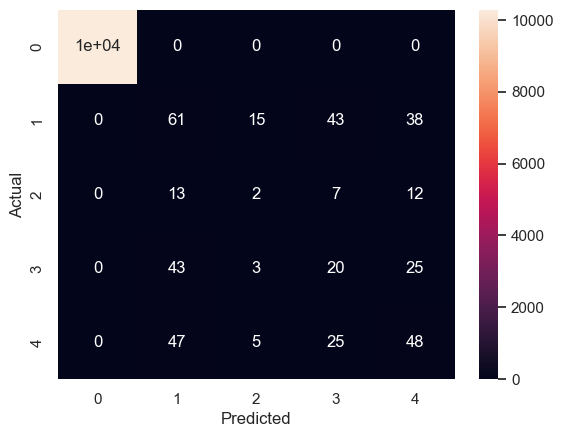

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train_sc, y_train)
y_pred = clf.predict(X_test_s_sc)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall Score: ", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score: ", 2 * (precision_score(y_test, y_pred, average='weighted') * recall_score(y_test, y_pred, average='weighted')) / (precision_score(y_test, y_pred, average='weighted') + recall_score(y_test, y_pred, average='weighted')))

# print the confusin matrix graphically
df = {'y_Actual': y_test, 'y_Predicted': y_pred}
df1 = pd.DataFrame(df, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df1['y_Actual'], df1['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.savefig('../Charts/confusion_matrix1.png', bbox_inches='tight')
plt.show()


In [53]:
import joblib
joblib.dump(clf, 'lung_cancer_stage_predictor_model.pkl')
model = joblib.load('lung_cancer_stage_predictor_model.pkl')
model.predict(X_test_s)

array([3, 3, 1, ..., 1, 1, 3], shape=(10686,))

In [54]:
predictions = model.predict(X_test_s)
df_pred = pd.DataFrame(predictions)
df_pred.head()

,0
0,3
1,3
2,1
3,1
4,1


## Risk for cancer

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X= df2.drop(['pid','days_to_cancer'],axis=1)
y= df2['days_to_cancer']
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

X_train,X_test_r,y_train,y_test= train_test_split(X,y,random_state=0,test_size=0.5)

scaler= StandardScaler()
X_train_sc= scaler.fit_transform(X_train)
X_test_r_sc = scaler.transform(X_test_r)

lr = LinearRegression()
lr.fit(X_train_sc, y_train)
y_pred = lr.predict(X_test_r_sc)

print("accuracy Score",lr.score(X_test_r_sc,y_test))
print("precision score",r2_score(y_test,y_pred))



Shape of X:  (53427, 11)
Shape of y:  (53427,)
accuracy Score 0.5802983115910411
precision score 0.5802983115910411


In [56]:
import joblib
joblib.dump(lr, 'lung_cancer_risk_predictor_model.pkl')
model = joblib.load('lung_cancer_risk_predictor_model.pkl')
model.predict(X_test_r)

array([147.17202282, 142.01127222, 171.01609137, ..., 153.6403486 ,
       139.34616706, 148.66085068], shape=(26714,))

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib  # For loading pre-trained models

def predict_cancer_presence_stage_risk(csv_file):
    """
    Predict cancer presence, stage, and risk based on input data.

    Parameters:
    csv_file (str): Path to the CSV file containing input data.

    Returns:
    pd.DataFrame: DataFrame with predictions for presence, stage, and risk.
    """
    # Load the CSV file
    data = pd.read_csv(csv_file)

    # Preprocess data for the presence model
    presence_features = [
        'GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL_CONSUMPTION', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']
    presence_data = data[presence_features].copy()

    # Preprocess data for the stage and risk models
    stage_stage_features = ['AGE','GENDER','days_to_cancer', 'race_American Indian or Alaskan Native', 'race_Asian', 'race_Black or African-American', 'race More than one race', 'race_Native Hawaiian or Other Pacific Islander', 'race_Others', 'race_Participant refused to answer', 'race_White']
    stage_stage_data = data[stage_stage_features].copy()
    stage_risk_data = data[stage_stage_features].copy()

    # Load pre-trained models
    presence_model = joblib.load('lung_cancer_predictor_model.pkl')
    stage_model = joblib.load('lung_cancer_stage_predictor_model.pkl')
    risk_model = joblib.load('lung_cancer_risk_predictor_model.pkl')

    # Make predictions
    data['cancer_presence'] = presence_model.predict(presence_data)
    data['cancer_stage'] = stage_model.predict(stage_stage_data)
    data['cancer_risk'] = risk_model.predict(stage_risk_data)

    # Return the data with predictions
    return data[['cancer_presence', 'cancer_stage', 'cancer_risk']]

# Example usage
predictions = predict_cancer_presence_stage_risk('../Datasets/input_data.csv')
print(predictions)
